In [62]:
library (ggplot2)

In [63]:
datos=read.csv2("datos.csv", header = TRUE)
notas=datos$promedio
DERS=datos$Puntuacion.total
colnames(datos)

[1] "R_1"              "R_2"              "R_3"              "R_4"             
 [5] "R_5"              "R_6"              "R_7"              "R_8"             
 [9] "R_9"              "R_10"             "R_11"             "R_12"            
[13] "R_13"             "R_14"             "R_15"             "R_16"            
[17] "R_17"             "R_18"             "R_19"             "R_20"            
[21] "R_21"             "R_22"             "R_23"             "R_24"            
[25] "R_25"             "R_26"             "R_27"             "R_28"            
[29] "R_29"             "R_30"             "R_31"             "R_32"            
[33] "R_33"             "R_34"             "R_35"             "R_36"            
[37] "edad"             "Sexo"             "Jornada"          "promedio"        
[41] "Trabaja"          "Puntuacion.total"

# Análisis DERS

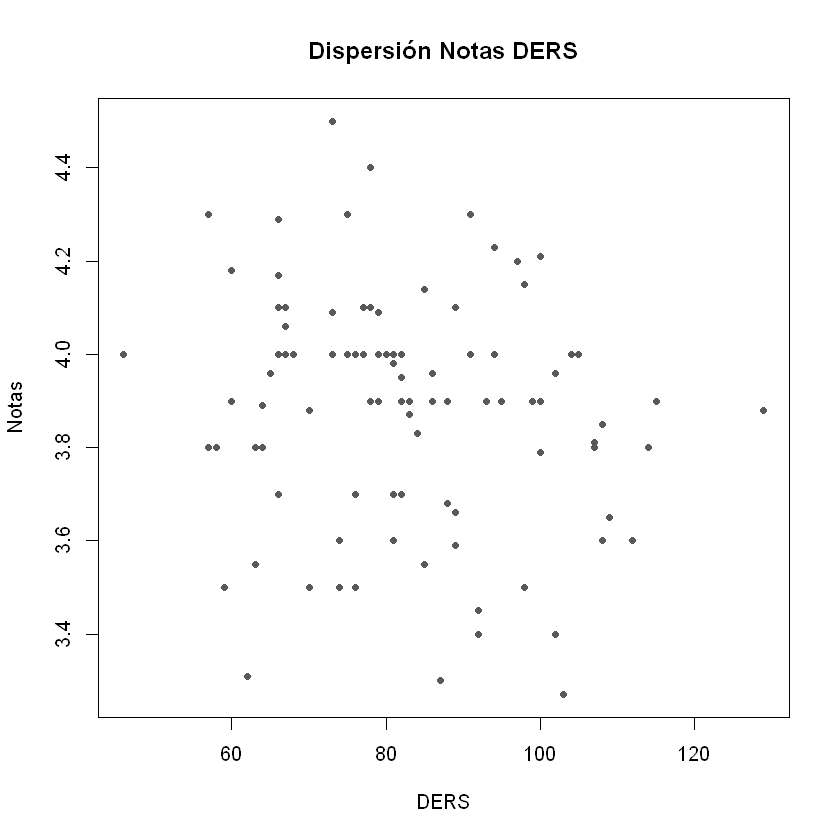

In [74]:
plot(DERS, notas, pch=16, col="gray35", cex=0.75, main="Dispersión Notas DERS", ylab="Notas")

In [65]:
cor.test(DERS,notas)


	Pearson's product-moment correlation

data:  DERS and notas
t = -1.458, df = 93, p-value = 0.1482
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.34076330  0.05367326
sample estimates:
       cor 
-0.1494868 


## Comparaciones DERS
###  Sexo


In [67]:
t.test(Puntuacion.total~Sexo, data = datos)


	Welch Two Sample t-test

data:  Puntuacion.total by Sexo
t = 1.6885, df = 31.23, p-value = 0.1013
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.308069 13.913332
sample estimates:
mean in group F mean in group M 
       84.30263        78.00000 


### Edad

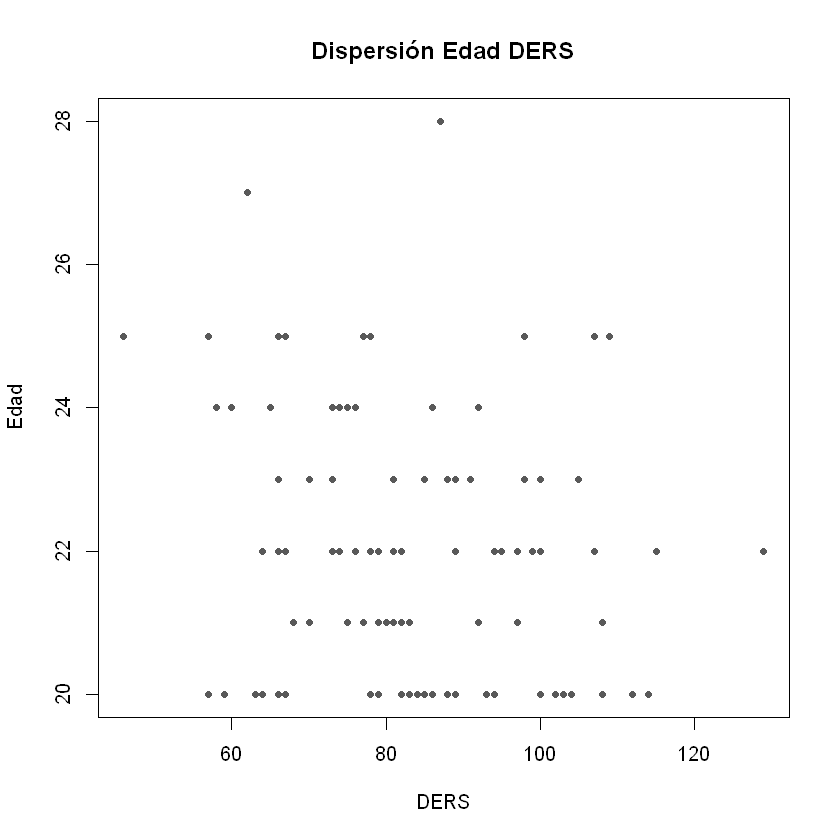

In [75]:
plot(DERS, datos$edad, 
     pch=16, 
     col="gray35", 
     cex=0.75,
     ylab="Edad",
     main="Dispersión Edad DERS")

In [69]:
cor.test(DERS, datos$edad)


	Pearson's product-moment correlation

data:  DERS and datos$edad
t = -1.7375, df = 93, p-value = 0.0856
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.36579065  0.02512063
sample estimates:
       cor 
-0.1773201 


###  Jornada

In [70]:
t.test(Puntuacion.total~Jornada, data = datos)


	Welch Two Sample t-test

data:  Puntuacion.total by Jornada
t = 1.0697, df = 90.506, p-value = 0.2876
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.015813 10.052486
sample estimates:
mean in group D mean in group N 
       84.63462        81.11628 


###  Trabaja

In [71]:
t.test(Puntuacion.total~Trabaja, data = datos)


	Welch Two Sample t-test

data:  Puntuacion.total by Trabaja
t = -0.25873, df = 90.686, p-value = 0.7964
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.128980  5.485923
sample estimates:
mean in group NO mean in group SI 
        82.54054         83.36207 


## Regresiones múltiples

'edad' 'Sexo' 'Jornada' 'promedio' 'Trabaja' 'Puntuacion.total'

In [76]:
reg_lin_DERS <- lm(Puntuacion.total ~ edad+Sexo+Jornada+promedio+Trabaja, datos)

In [78]:
summary(reg_lin_DERS)


Call:
lm(formula = Puntuacion.total ~ edad + Sexo + Jornada + promedio + 
    Trabaja, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.985 -10.388  -1.048  11.462  42.739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.5333    31.0998   4.808 6.16e-06 ***
edad         -1.2704     0.9322  -1.363    0.176    
SexoM        -5.0590     4.3047  -1.175    0.243    
JornadaN     -2.2790     3.8283  -0.595    0.553    
promedio     -9.8813     6.3459  -1.557    0.123    
TrabajaSI     3.0151     3.7057   0.814    0.418    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.78 on 89 degrees of freedom
Multiple R-squared:  0.07992,	Adjusted R-squared:  0.02823 
F-statistic: 1.546 on 5 and 89 DF,  p-value: 0.1837


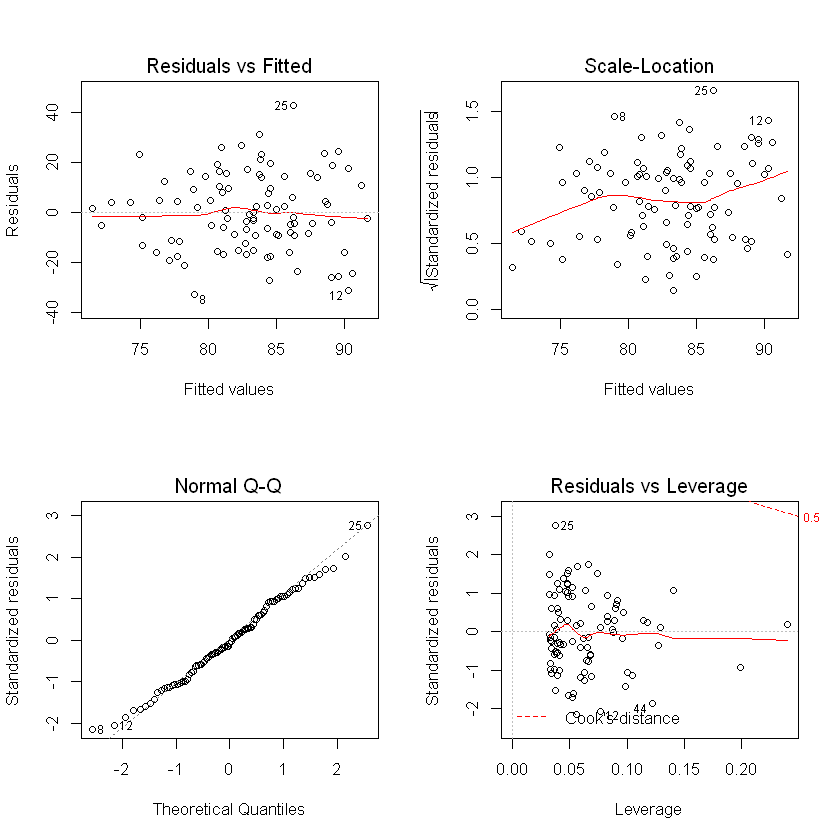

In [81]:
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(reg_lin_DERS)

### Regresión Notas

In [79]:
reg_lin_notas <- lm(promedio ~ edad+Sexo+Jornada+Puntuacion.total+Trabaja, datos)

In [80]:
summary(reg_lin_notas)


Call:
lm(formula = promedio ~ edad + Sexo + Jornada + Puntuacion.total + 
    Trabaja, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60916 -0.12659  0.02811  0.15147  0.64195 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.0452804  0.3835035  10.548   <2e-16 ***
edad              0.0024844  0.0155203   0.160    0.873    
SexoM            -0.0759428  0.0710389  -1.069    0.288    
JornadaN         -0.0003171  0.0632192  -0.005    0.996    
Puntuacion.total -0.0026839  0.0017236  -1.557    0.123    
TrabajaSI         0.0278140  0.0612282   0.454    0.651    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2601 on 89 degrees of freedom
Multiple R-squared:  0.03847,	Adjusted R-squared:  -0.01555 
F-statistic: 0.7121 on 5 and 89 DF,  p-value: 0.6159


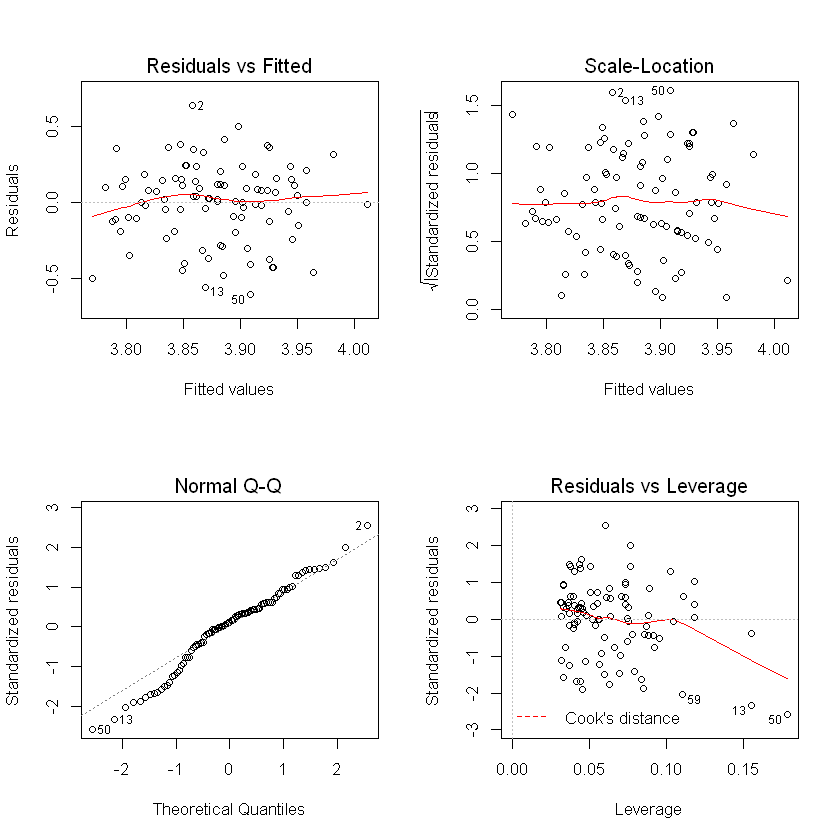

In [82]:
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(reg_lin_notas)